# AirBnB Fair Valuation

Welcome to Airbnb Analysis Corp.! Your task is to set the competitive **daily accomodation rate** for a client's house in Bondi Beach. The owner currently charges $500. We have been tasked to estimate a **fair value** that the owner should be charging. The house has the following characteristics and constraints. While developing this model you came to realise that Airbnb can use your model to estimate the fair value of any property on their database, your are effectively creating a recommendation model for all prospective hosts!


1. The owner has been a host since **August 2010**
1. The location is **lon:151.274506, lat:33.889087**
1. The current review score rating **95.0**
1. Number of reviews **53**
1. Minimum nights **4**
1. The house can accomodate **10** people.
1. The owner currently charges a cleaning fee of **370**
1. The house has **3 bathrooms, 5 bedrooms, 7 beds**.
1. The house is available for **255 of the next 365 days**
1. The client is **verified**, and they are a **superhost**.
1. The cancelation policy is **strict with a 14 days grace period**.
1. The host requires a security deposit of **$1,500**


*All values strictly apply to the month of July 2018*

In [1]:
import pandas as pd
import numpy as np
import scipy as sp 

import matplotlib.pyplot as plt
import seaborn as sns
import folium

import os
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Defining our Sample Client Data
from dateutil import parser
dict_client = {}

dict_client["city"] = "Bondi Beach"
dict_client["longitude"] = 151.274506
dict_client["latitude"] = -33.889087
dict_client["review_scores_rating"] = 95
dict_client["number_of_reviews"] = 53
dict_client["minimum_nights"] = 4
dict_client["accommodates"] = 10
dict_client["bathrooms"] = 3
dict_client["bedrooms"] = 5
dict_client["beds"] = 7
dict_client["security_deposit"] = 1500
dict_client["cleaning_fee"] = 370
dict_client["property_type"] = "House"
dict_client["room_type"] = "Entire home/apt"
dict_client["availability_365"] = 255
dict_client["host_identity_verified"] = 't'  ## 1 for yes, 0 for no
dict_client["host_is_superhost"] = 't'
dict_client["cancellation_policy"] = "strict_14_with_grace_period"
dict_client["host_since"] = parser.parse("01-08-2010")

In [38]:
#Getting the data
from pathlib import Path
github_p = "https://raw.githubusercontent.com/Finance-781/FinML/master/Lecture%202%20-%20End-to-End%20ML%20Project%20/Practice/"

my_file = Path("datasets/sydney_airbnb.csv") 
if os.path.isfile(my_file):
    print("Local file found")      
    df = pd.read_csv('datasets/sydney_airbnb.csv')
else:
    print("Be patient: loading from github (2 minutes)")
    df = pd.read_csv(github_p+'datasets/sydney_airbnb.csv')
    print("Done")

Local file found


In [39]:
df.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,11156,https://www.airbnb.com/rooms/11156,An Oasis in the City,Very central to the city which can be reached ...,Potts Pt. is a vibrant and popular inner-city...,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...","$150.00 key security deposit, refundable on re...",It is 7 minutes walk to the Kings Cross.train ...,Kitchen & laundry facilities. Shared bathroom.,...,10.0,10.0,10.0,9.0,f,moderate,f,f,1,1.69
1,12351,https://www.airbnb.com/rooms/12351,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,"We're pretty relaxed hosts, and we fully appre...",Come stay with Vinh & Stuart (Awarded as one o...,"Pyrmont is an inner-city village of Sydney, on...",We've a few reasons for the 6.00pm arrival tim...,Our home is centrally located and an easy walk...,We look forward to welcoming you just as we wo...,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,t,t,2,4.83
2,14250,https://www.airbnb.com/rooms/14250,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Our home is a thirty minute walk along the sea...,"Beautifully renovated, spacious and quiet, our...",Balgowlah Heights is one of the most prestigio...,NaN,Balgowlah - Manly bus # 131 or #132 (Bus stop...,Guests have access to whole house except locke...,...,10.0,8.0,10.0,10.0,f,strict_14_with_grace_period,f,f,2,0.03
3,14935,https://www.airbnb.com/rooms/14935,Eco-conscious Travellers: Private Room,Welcome! This apartment will suit a short term...,I live upstairs in my own room with my own bat...,Welcome! This apartment will suit a short term...,NaN,"The building can be hard to find, so please en...",DIRECTIONS VIA TAXI: Get dropped off at Renwic...,"I work from home most times - so if I'm home, ...",...,9.0,10.0,9.0,9.0,f,moderate,f,f,2,2.14
4,14974,https://www.airbnb.com/rooms/14974,Eco-conscious Traveller: Sofa Couch,Welcome! This apartment will suit a short term...,Comes with a fully equipped gym and pool - whi...,Welcome! This apartment will suit a short term...,NaN,I live upstairs in my own room with my own bat...,DIRECTIONS VIA TAXI: Get dropped off at Renwic...,"I work from home most times - so if I'm home, ...",...,9.0,9.0,9.0,9.0,f,moderate,f,f,2,1.78


In [40]:
print(df.shape)
print(len(dict_client))

(27070, 84)
19


In [41]:
co=[i for i in dict_client]
co=["price"]+co
print(co)

['price', 'city', 'longitude', 'latitude', 'review_scores_rating', 'number_of_reviews', 'minimum_nights', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'property_type', 'room_type', 'availability_365', 'host_identity_verified', 'host_is_superhost', 'cancellation_policy', 'host_since']


In [42]:
df=df[co]
df.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,cancellation_policy,host_since
0,$65.00,Potts Point,151.226562,-33.869168,92.0,177,2,1,NaN,1.0,1.0,NaN,NaN,Apartment,Private room,339,f,t,moderate,23/09/09
1,$98.00,Pyrmont,151.191896,-33.865153,95.0,468,2,2,1.0,1.0,1.0,$0.00,$55.00,Townhouse,Private room,188,t,f,strict_14_with_grace_period,14/05/09
2,$469.00,Balgowlah,151.261722,-33.800929,100.0,1,5,6,3.0,3.0,3.0,$900.00,$100.00,House,Entire home/apt,168,t,f,strict_14_with_grace_period,20/11/09
3,$63.00,Redfern,151.200450,-33.890765,89.0,172,2,2,1.0,1.0,1.0,NaN,NaN,Apartment,Private room,215,t,f,moderate,30/11/09
4,$39.00,Redfern,151.200896,-33.889667,90.0,147,2,1,2.0,1.0,1.0,NaN,NaN,Apartment,Shared room,287,t,f,moderate,30/11/09


In [43]:
df.shape

(27070, 20)

In [44]:
df.dtypes

price                      object
city                       object
longitude                 float64
latitude                  float64
review_scores_rating      float64
number_of_reviews           int64
minimum_nights              int64
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
security_deposit           object
cleaning_fee               object
property_type              object
room_type                  object
availability_365            int64
host_identity_verified     object
host_is_superhost          object
cancellation_policy        object
host_since                 object
dtype: object

In [45]:
import re
price_list = ["price","cleaning_fee","security_deposit"]

for col in price_list:
    df[col] = df[col].fillna("0")
    df[col] = df[col].apply(lambda x: float(re.compile('[^0-9eE.]').sub('', x)) if len(x)>0 else 0)

In [51]:
df['host_since']=pd.to_datetime(df['host_since'])

In [52]:
df.dtypes

price                            float64
city                              object
longitude                        float64
latitude                         float64
review_scores_rating             float64
number_of_reviews                  int64
minimum_nights                     int64
accommodates                       int64
bathrooms                        float64
bedrooms                         float64
beds                             float64
security_deposit                 float64
cleaning_fee                     float64
property_type                     object
room_type                         object
availability_365                   int64
host_identity_verified            object
host_is_superhost                 object
cancellation_policy               object
host_since                datetime64[ns]
dtype: object

In [53]:
df['city'].value_counts()

Bondi Beach             1676
Manly                    962
Surry Hills              920
Bondi                    788
Randwick                 686
                        ... 
Paddington/Woollahra       1
Tamarama                   1
Dawes Point                1
Wollarha                   1
Seven Hills                1
Name: city, Length: 741, dtype: int64

In [54]:
len(df.city.unique())

742

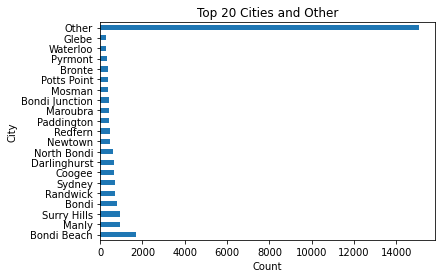

In [55]:
city_counts = df['city'].value_counts()

# Select the top 20 most common cities
top_20_cities = city_counts[:20]

# Group the rest of the cities as 'Other'
other_count = city_counts[20:].sum()
top_20_cities['Other'] = other_count

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the sidebar chart
top_20_cities.plot(kind='barh', ax=ax)

# Set labels and title
ax.set_xlabel('Count')
ax.set_ylabel('City')
ax.set_title('Top 20 Cities and Other')

# Show the chart
plt.show()



Top 20 citys

Bondi beach is most frequent one


Bondi Beach                1676

There are 742 citys

In [34]:
sample_size = 100

# Calculate the sampling probabilities based on the original distribution
sampling_probabilities = df['price'].value_counts(normalize=True)

# Take a sample from the original dataset based on the calculated probabilities
sampled_data = df.sample(n=sample_size, weights=df['price'].map(sampling_probabilities))

# Create a map centered around the mean latitude and longitude values of the sampled data
map_center = [sampled_data['latitude'].mean(), sampled_data['longitude'].mean()]
map_obj = folium.Map(location=map_center, zoom_start=10)

# Iterate over the rows of the sampled data
for index, row in sampled_data.iterrows():
    # Get the latitude and longitude values for each row
    latitude = row['latitude']
    longitude = row['longitude']

    # Add a marker for each latitude and longitude point
    folium.Marker([latitude, longitude]).add_to(map_obj)

# Display the map
map_obj

In [104]:
sampled_data= df.query('city=="Bondi Beach"').head(100)

# Create a map centered around the mean latitude and longitude values of the sampled data
map_center = [sampled_data['latitude'].mean(), sampled_data['longitude'].mean()]
map_obj = folium.Map(location=map_center, zoom_start=10)

# Iterate over the rows of the sampled data
for index, row in sampled_data.iterrows():
    # Get the latitude and longitude values for each row
    latitude = row['latitude']
    longitude = row['longitude']

    # Add a marker for each latitude and longitude point
    folium.Marker([latitude, longitude]).add_to(map_obj)

# Display the map
map_obj

<Axes: ylabel='price'>

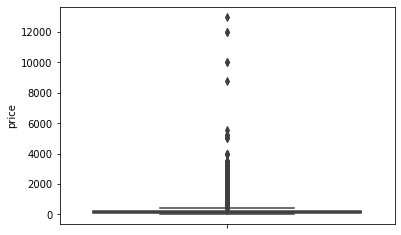

In [58]:
sns.boxplot( y=df["price"] )

<Axes: ylabel='Frequency'>

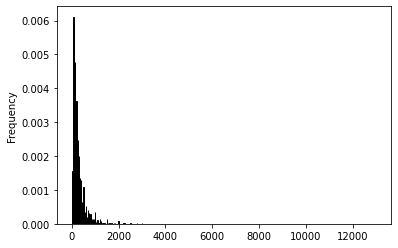

In [62]:
fig,ax=plt.subplots()

df['price'].plot(kind='hist',bins=1000, density=True, edgecolor='black', ax=ax)


In [63]:
# We can see a few high value pries, with the majority being close to bottom (seems like ~100-200)

# We now use skew to check for the symmetry of the data distribution (0 being perfectly symmetrical)

df['price'].skew()


13.808558337216192

In [64]:
df['price'].kurtosis()

413.4301463784445

In [66]:
print(df['price'].quantile(0.995))
print(df['price'].mean())
print(df['price'].median())

1600.0
209.27879571481344
135.0


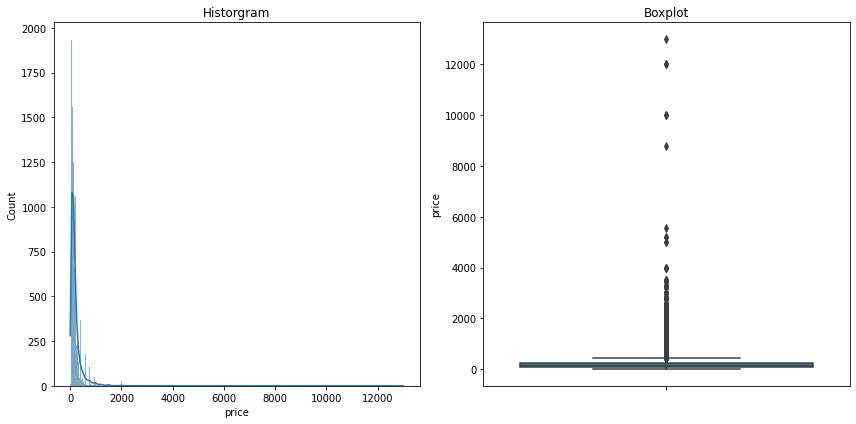

In [71]:
fig , axes= plt.subplots(1,2,figsize=(12,6))

sns.histplot(df['price'], kde=True, ax=axes[0])
axes[0].set_title('Historgram')

sns.boxplot(y=df['price'],ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()
plt.show()

In [78]:
print(f"Skewness: {df['price'].skew()}")
print('Right Skewness is above 0')
print('Left Skew below 0\n')
print(f"Kurtosis: {df['price'].kurtosis()}")
print('if kurtosis above 0 high tighdeness and constration around the mean')

Skewness: 13.808558337216192
Right Skewness is above 0
Left Skew below 0

Kurtosis: 413.4301463784445
if kurtosis above 0 high tighdeness and constration around the mean


In [77]:
print(f"the mean is: {df['price'].mean()}")
print(f"the standard devation: {df['price'].std()}")
print('\nThe standard normal distribution the mean is 0 and the standard deviation is 1. ')

the mean is: 209.27879571481344
the standard devation: 304.3362711237153

The standard normal distribution the mean is 0 and the standard deviation is 1. 


**Based on the analysis above we should remove only uper limit outliers**

In [82]:
df['price'].quantile(0.995)

1600.0

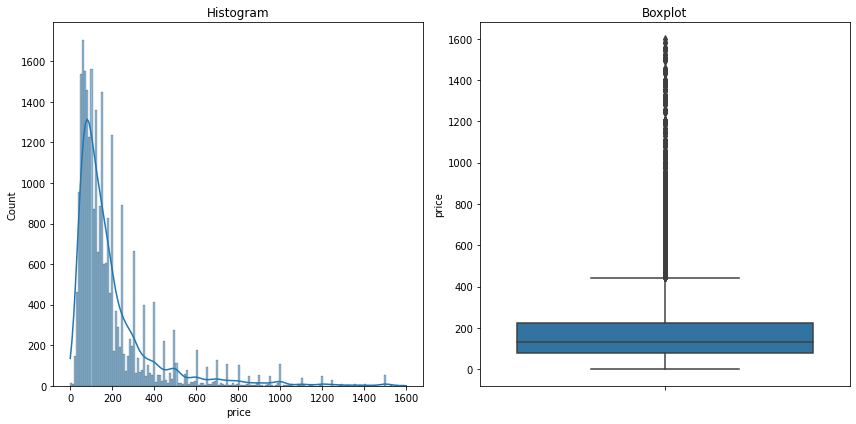

Skewness: 2.957872457159033
Kurtosis: 11.18710844862683


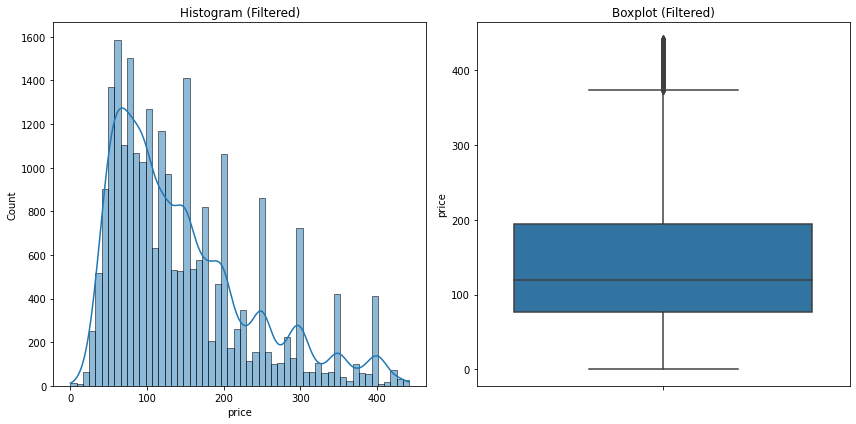

Skewness: 1.0808052853056058
Kurtosis: 0.5818627146758351

Number of outliers: 2398
Filtered data length: 24533


In [88]:
# Assuming df is your DataFrame and 'column_name' is the numerical column you want to examine
# Replace 'column_name' with the actual name of your column

# Extract the column of interest
column_data = df['price']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Visualize the distribution using histogram and boxplot
sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_title('Histogram')

sns.boxplot(y=column_data, ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()
plt.show()

# Calculate statistical measurements
skewness = column_data.skew()
kurtosis = column_data.kurtosis()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

# Identify and remove outliers using quartiles
Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
filtered_data = column_data[(column_data >= lower_bound) & (column_data <= upper_bound)]

# Create subplots for the filtered data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Visualize the filtered data using histogram and boxplot
sns.histplot(filtered_data, kde=True, ax=axes[0])
axes[0].set_title('Histogram (Filtered)')

sns.boxplot(y=filtered_data, ax=axes[1])
axes[1].set_title('Boxplot (Filtered)')

plt.tight_layout()
plt.show()

skewness = filtered_data.skew()
kurtosis = filtered_data.kurtosis()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}\n")

# Additional information
print(f"Number of outliers: {len(outliers)}")
print(f"Filtered data length: {len(filtered_data)}")

In [84]:
# Now we remove all prices over the 99.5% percentile (or in order words, we keep all data rows under the 99.5% value of 1600)
df = df[df["price"]<df["price"].quantile(0.995)].reset_index(drop=True)

In [86]:
df.shape

(26931, 20)

In [87]:
# Let's check our skew now
df["price"].skew()

2.957872457159033

In [89]:
# Let's check our data for null values
df.isnull().sum()

price                        0
city                        32
longitude                    0
latitude                     0
review_scores_rating      7466
number_of_reviews            0
minimum_nights               0
accommodates                 0
bathrooms                   22
bedrooms                     8
beds                        33
security_deposit             0
cleaning_fee                 0
property_type                0
room_type                    0
availability_365             0
host_identity_verified      34
host_is_superhost           34
cancellation_policy          0
host_since                  34
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26931 entries, 0 to 26930
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   26931 non-null  float64       
 1   city                    26899 non-null  object        
 2   longitude               26931 non-null  float64       
 3   latitude                26931 non-null  float64       
 4   review_scores_rating    19465 non-null  float64       
 5   number_of_reviews       26931 non-null  int64         
 6   minimum_nights          26931 non-null  int64         
 7   accommodates            26931 non-null  int64         
 8   bathrooms               26909 non-null  float64       
 9   bedrooms                26923 non-null  float64       
 10  beds                    26898 non-null  float64       
 11  security_deposit        26931 non-null  float64       
 12  cleaning_fee            26931 non-null  float6

In [91]:
df.describe()

,price,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,availability_365
count,26931.000000,26931.000000,26931.000000,19465.000000,26931.000000,26931.000000,26931.000000,26909.000000,26923.000000,26898.000000,26931.000000,26931.000000,26931.000000
mean,196.065464,151.210438,-33.862675,93.404932,14.070031,4.482010,3.357395,1.340964,1.600787,1.996542,293.870261,65.268687,101.575916
std,199.813830,0.079425,0.071861,9.358515,29.870227,14.421896,2.160004,0.638187,1.091213,1.506535,549.642202,84.886663,127.822623
min,0.000000,150.644964,-34.135212,20.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80.000000,151.184336,-33.897653,90.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,132.000000,151.223029,-33.883161,96.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,40.000000,32.000000
75%,225.000000,151.264706,-33.832189,100.000000,13.000000,5.000000,4.000000,1.500000,2.000000,2.000000,400.000000,99.000000,179.000000
max,1599.000000,151.339811,-33.389728,100.000000,468.000000,1000.000000,16.000000,10.000000,46.000000,29.000000,7000.000000,999.000000,365.000000


review_scores_rating

In [106]:
df['review_scores_rating'].describe()

count    19465.000000
mean        93.404932
std          9.358515
min         20.000000
25%         90.000000
50%         96.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

rating out of 100%

In [107]:
df['review_scores_rating'].isnull().sum()

7466

Text(0.5, 1.0, 'review distribution')

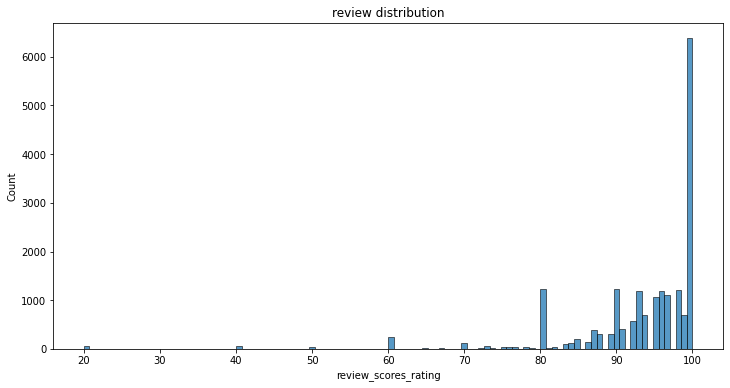

In [108]:
fig ,ax=plt.subplots(figsize=(12,6))
sns.histplot(df['review_scores_rating'],ax=ax)
ax.set_title('review distribution')

In [126]:
df['minimum_nights'].eq(0).sum(),df['minimum_nights'].eq(1).sum(),df['minimum_nights'].shape

(0, 6874, (26931,))

Couldn't convert:    host_identity_verified
Couldn't convert:    host_is_superhost


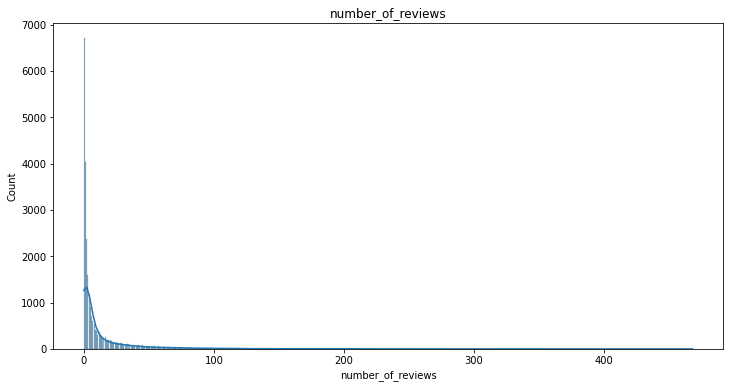

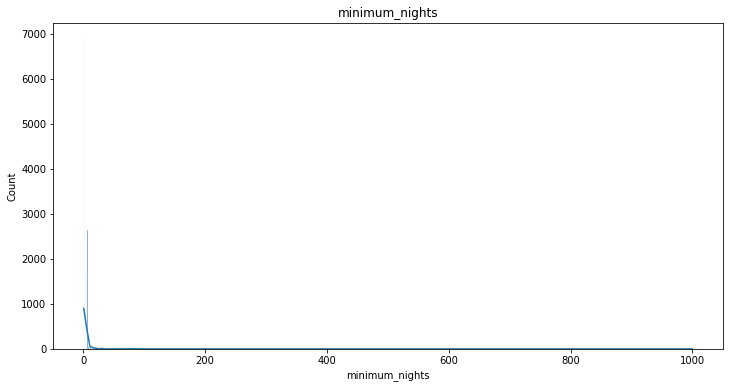

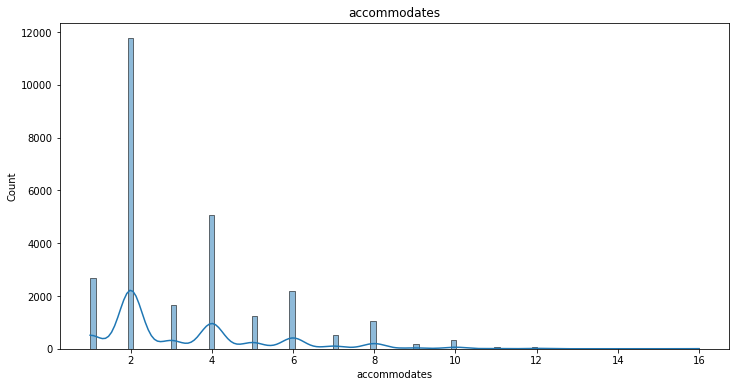

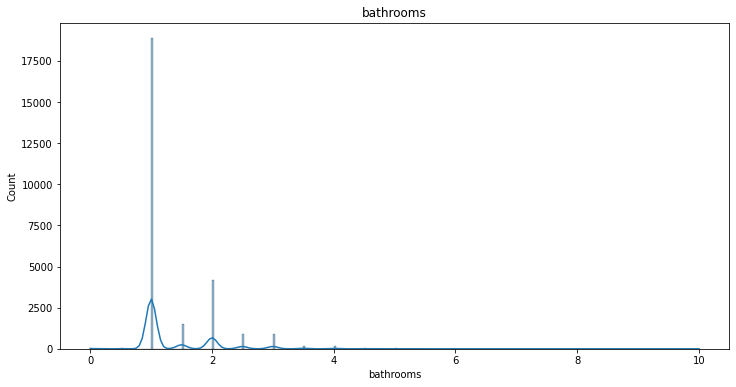

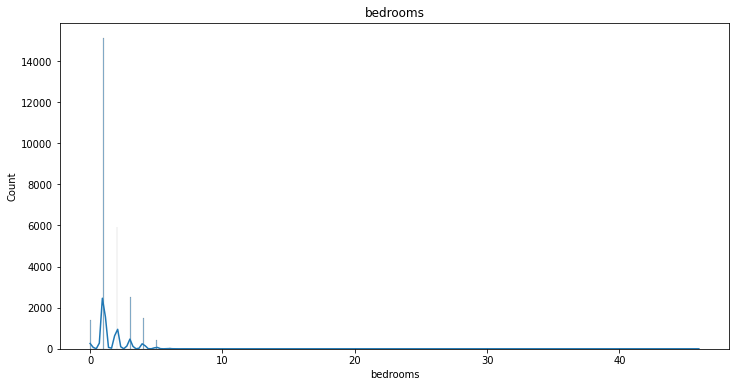

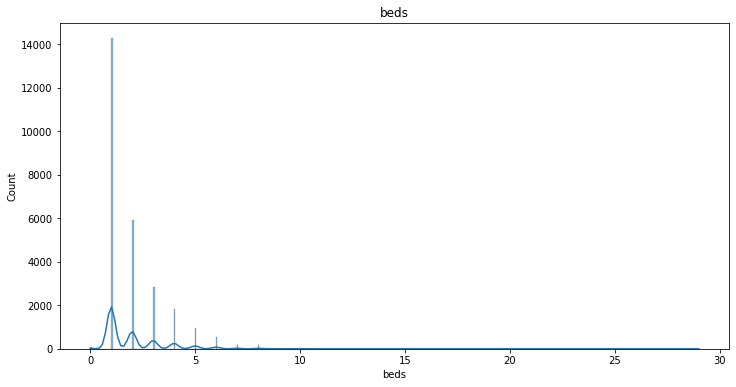

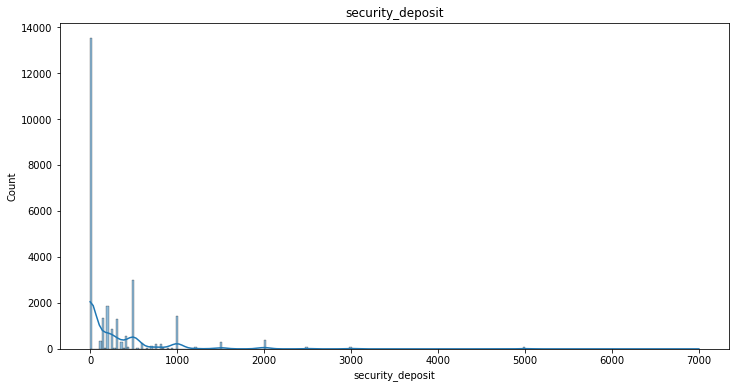

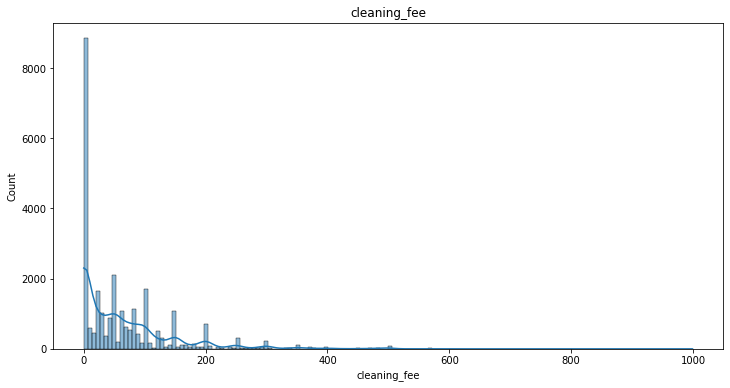

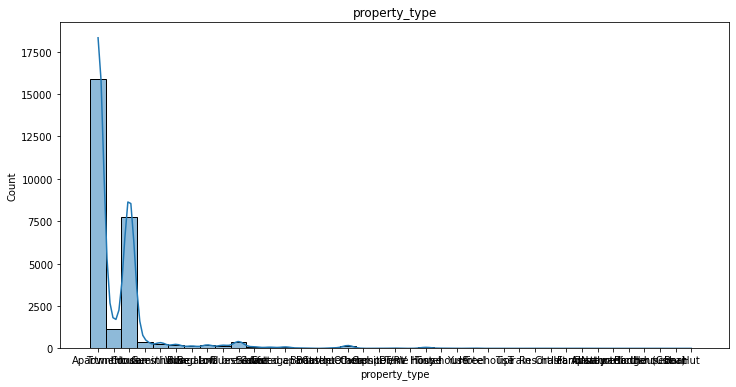

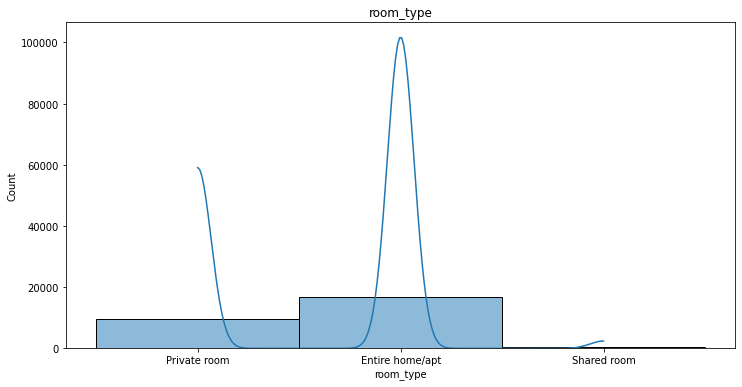

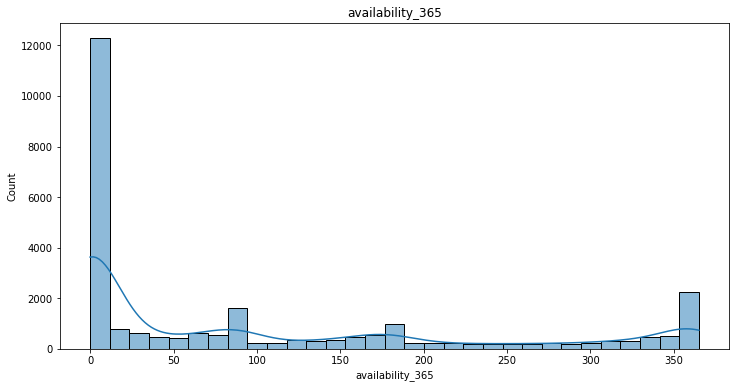

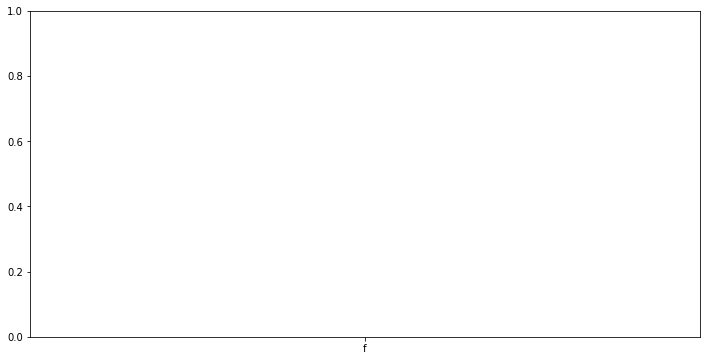

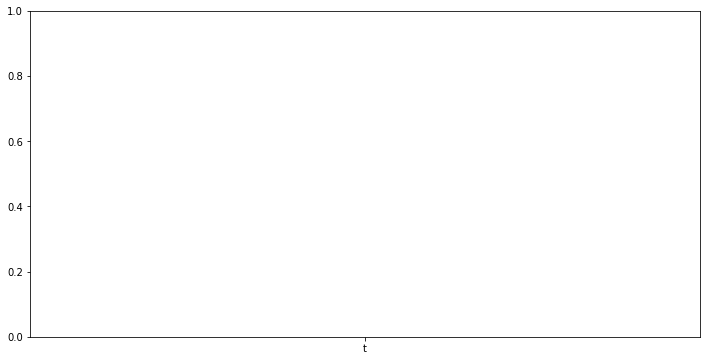

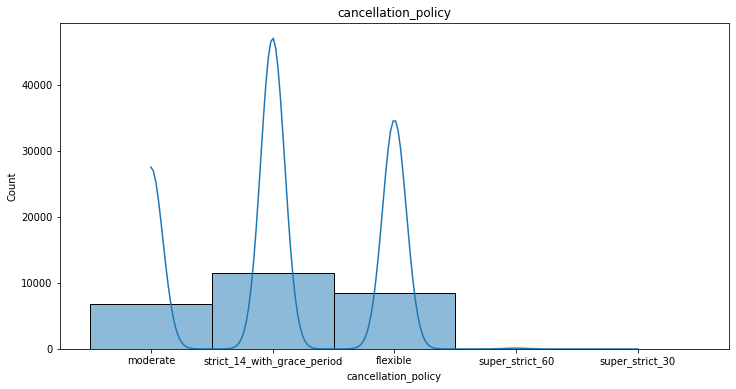

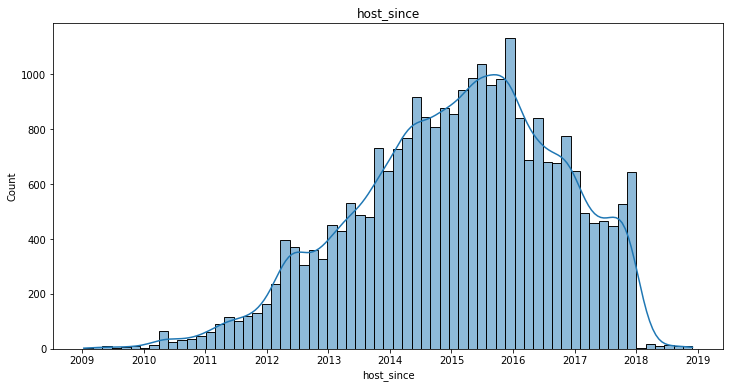

In [122]:
for i in df.columns[5:]:
    try:
        fig,ax=plt.subplots(figsize=(12,6))
        sns.histplot(df[i],kde=True,ax=ax)
        ax.set_title(i)
    except:
        print("Couldn't convert:   ",i)
        pass

In [127]:
df.property_type.value_counts()

Apartment                 15901
House                      7722
Townhouse                  1145
Condominium                 351
Guest suite                 350
Guesthouse                  287
Villa                       201
Loft                        175
Bed and breakfast           156
Other                       147
Bungalow                    118
Cabin                        77
Serviced apartment           74
Cottage                      60
Hostel                       53
Boutique hotel               25
Boat                         18
Hotel                        13
Tent                         13
Tiny house                    9
Resort                        6
Camper/RV                     6
Island                        3
Farm stay                     3
Yurt                          2
Tipi                          2
Chalet                        2
Nature lodge                  1
Dome house                    1
Aparthotel                    1
Train                         1
Barn    

In [ ]:
df.property_type.value_counts()